Here we are going to be implementing the clustering algorithms: k-Means and Agglomerative/Hierarchical clustering.

1. Each task is associated with each type of clustering mathod.
2. Each task will use its own dataset that is already written in the cell.
3. Each assignment is presenting a challenge.

## Task1: K-means

Run this cell to read and display top 5 rows of data

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns
import warnings
import numpy as np
from sklearn.cluster import AgglomerativeClustering
warnings.filterwarnings("ignore")


cluster_data = pd.read_csv("Country-data.csv")
cluster_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200



Check if there are any missing values. If yes, fill them with appropriate methods. Regardless of any action, explain your decision for the action.

In [ ]:
# Check for missing values in the DataFrame
print(cluster_data.isnull().sum())
if cluster_data.isnull().values.any():
    print('There are missing values in the DataFrame')

    # Fill missing values with the mean of the column
    df = cluster_data.fillna(cluster_data.mean())
    print('DataFrame after filling missing values:')
    print(cluster_data)
else:
    print('There are no missing values in the DataFrame')

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64
There are no missing values in the DataFrame


In [ ]:
cluster_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


Here we used mean to fill the missing values.

Mean usage is a simple technique that can give a reliable estimate of the missing variables. When the data contains extreme values, mean is a useful option because it is less sensitive to outliers than the median. The distribution of the data remains unchanged when missing values are replaced with the mean as well, which is crucial for various statistical studies.

We also can see that there 9 numeric values and 1 nominal value.
For clustering purposes we would be droping the nominal value and continue with our numeric values.



Drop necessary columns that won't be used for clustering and Scale the data for further processing. Display the processed data. Explain your actions.

In [ ]:
#Drop unnecessary columns
cluster_data = cluster_data.drop(['country'], axis=1)

Since the 'country' column won't be utilized for clustering, we removed it. As, country is not a numeric attribute we dropped it.



In [ ]:
# Scale the data
scaler = StandardScaler()
scaled_clusterdata = scaler.fit_transform(cluster_data)

# Display the processed data
print(scaled_clusterdata)

[[ 1.29153238 -1.13827979  0.27908825 ... -1.61909203  1.90288227
  -0.67917961]
 [-0.5389489  -0.47965843 -0.09701618 ...  0.64786643 -0.85997281
  -0.48562324]
 [-0.27283273 -0.09912164 -0.96607302 ...  0.67042323 -0.0384044
  -0.46537561]
 ...
 [-0.37231541  1.13030491  0.0088773  ...  0.28695762 -0.66120626
  -0.63775406]
 [ 0.44841668 -0.40647827 -0.59727159 ... -0.34463279  1.14094382
  -0.63775406]
 [ 1.11495062 -0.15034774 -0.33801514 ... -2.09278484  1.6246091
  -0.62954556]]


Then we scaled the data using Scikit-learn's StandardScaler() class. This scales every attribute to have a mean of 0 and a standard deviation of 1.

Scaling assures that each feature is on the same scale and has the same weight during the clustering process, scaling is a crucial preprocessing step for clustering.



In this task, you will be using the elbow method to determine the optimal number of clusters for k-means clustering.

We need some way to determine whether we are using the right number of clusters when using k-means clustering. One method to validate the number of clusters is the elbow method.

For this task, you need to perform the elbow method for k from 2 to 12 and plot a line chart of the SSE for each value of k, and determine the best k (the number of clusters).

Explain from the graph which is the most appropriate value for k.

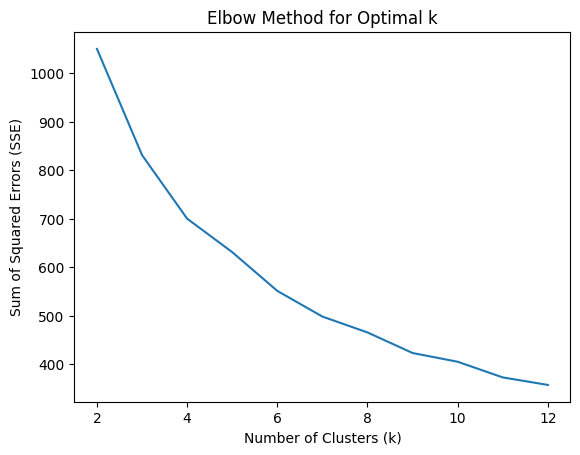

In [ ]:
# Perform elbow method for k from 2 to 12
sse = {}
for k in range(2, 13):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(scaled_clusterdata)
    sse[k] = kmeans.inertia_

# Plot SSE for each value of k
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for Optimal k')
plt.show()

As seen in the following plot, the SSE declines as the number of clusters rises, but the rate of decline slows as k rises. At k=4, we can see smooth curve. It does not show a definate "elbow" point in the figure where the pace of decline in SSE slows down. As a result, k=4 can be a solution but we can not say it certinity.



The elbow method gives an idea for which can be the most appropriate value for k. However, for cross-checking it, we use the Silhouette score to select the most appropriate value for K.

Revising what Silhouette method mean? Silhouette score is the score used to study the separation distance between the resulting clusters. The silhouette average value displays a measure of how close in average each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually. This measure has a range of [-1, 1]. Hence, the more score is near to +1 indicates the more clear the clusters formed are clearly visible. And the more the score tends to -1 end, the more overlapping the clusters are, which we dont want.

Apply Silhouette analysis on the same data and display the score for each K value(2-12). Explain which K value you selected from the results and why?

Silhouette score k=2: 0.726
Silhouette score k=3: 0.700
Silhouette score k=4: 0.611
Silhouette score k=5: 0.574
Silhouette score k=6: 0.590
Silhouette score k=7: 0.594
Silhouette score k=8: 0.596
Silhouette score k=9: 0.554
Silhouette score k=10: 0.559
Silhouette score k=11: 0.552
Silhouette score k=12: 0.532


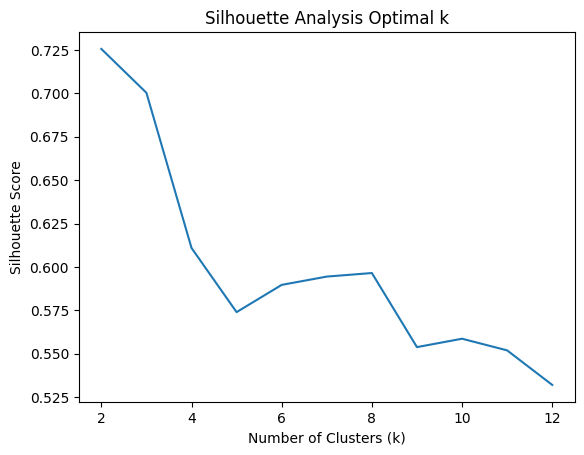

In [ ]:
#Silhouette analysis for k from 2 to 12
silhouette_scores = {}
for k in range(2, 13):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(cluster_data)
    score = silhouette_score(cluster_data, kmeans.labels_)
    silhouette_scores[k] = score
    print(f'Silhouette score k={k}: {score:.3f}')

# Ploting Silhouette scores
plt.plot(list(silhouette_scores.keys()), list(silhouette_scores.values()))
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis Optimal k')
plt.show()

#Interpret!
The results show that k=2 and k=3 give the highest Silhouette scores, respectively. This means that depending on the particular needs of the data, 2 or 3 clusters are the optimal number for this dataset.
As by Elbow method we can see, k=4 is not optimal solution.Silhouette scores, 2 or 3 clusters are the optimal number for this dataset.
Silhouette score is the more intricate approach, which considers the distances between the data points and the clusters to which they are connected. Each data point's cluster assignment is evaluated together with how distinctively it differs from the others.
We choose k=3 as optimal number of clusters for us.



With the best K value use K-means algorithm on the data. Print out the whole data along with the cluster labels assigned for each row in the form of new column.

In [ ]:

# Apply K-means clustering with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_clusterdata)
labels = kmeans.labels_

# Add the cluster labels as a new column to the original dataframe
cluster_data['Cluster'] = labels

# Print the updated dataframe
print(cluster_data)

     child_mort  exports  health  imports  income  inflation  life_expec  \
0          90.2     10.0    7.58     44.9    1610       9.44        56.2   
1          16.6     28.0    6.55     48.6    9930       4.49        76.3   
2          27.3     38.4    4.17     31.4   12900      16.10        76.5   
3         119.0     62.3    2.85     42.9    5900      22.40        60.1   
4          10.3     45.5    6.03     58.9   19100       1.44        76.8   
..          ...      ...     ...      ...     ...        ...         ...   
162        29.2     46.6    5.25     52.7    2950       2.62        63.0   
163        17.1     28.5    4.91     17.6   16500      45.90        75.4   
164        23.3     72.0    6.84     80.2    4490      12.10        73.1   
165        56.3     30.0    5.18     34.4    4480      23.60        67.5   
166        83.1     37.0    5.89     30.9    3280      14.00        52.0   

     total_fer   gdpp  Cluster  
0         5.82    553        1  
1         1.65   4090



For each cluster that is formed, display the average value for each column from the dataset. Remember to use right dataset!

Most importantly, interpret the results that you just displayed. Interpret, do not read out the results again!

In [ ]:
cluster_means = cluster_data.groupby('Cluster').mean()
print(cluster_means)

         child_mort    exports    health    imports        income  inflation  \
Cluster                                                                        
0          5.000000  58.738889  8.807778  51.491667  45672.222222   2.671250   
1         92.961702  29.151277  6.388511  42.323404   3942.404255  12.019681   
2         21.927381  40.243917  6.200952  47.473404  12305.595238   7.600905   

         life_expec  total_fer          gdpp  
Cluster                                       
0         80.127778   1.752778  42494.444444  
1         59.187234   5.008085   1922.382979  
2         72.814286   2.307500   6486.452381  


In [ ]:
# Interpret your results
# Cluster A:
# Lowest number of under-5-year-old deaths children per 1,000 live births.
# highest overall health expenses per individual.
# greatest net income per individual
# The lowest measure of the Total GDP's yearly growth rate
# life expectancy highest
# GDP-highest per individual

# Cluster B:
# Highest number of under-5-year-old children deaths per 1,000 live births.
# Lowest Exports of goods per individual.
# Highest measure of the Total GDP's yearly growth rate
# life expectation lowest
# GDP-Lowest per individual.
# Higest inflation

# Cluster C:
# lowest overall health expenses per person.




Display top 5 countries within each group/cluster. If there aren't enough countries within that cluster, just display that many.

In [ ]:
cluster_data1 = pd.read_csv("Country-data.csv")
cluster_data = pd.concat((cluster_data,cluster_data1['country']), axis =1)
df_0 = cluster_data[cluster_data.Cluster==0]
df_1 = cluster_data[cluster_data.Cluster==1]
df_2 = cluster_data[cluster_data.Cluster==2]
display('CLUSTER A')
display(cluster_data[cluster_data.Cluster==0].country.head(5))
display('CLUSTER B')
display(cluster_data[cluster_data.Cluster==1].country.head(5))
display('CLUSTER C')
display(cluster_data[cluster_data.Cluster==2].country.head(5))

'CLUSTER A'

7     Australia
8       Austria
11      Bahrain
15      Belgium
23       Brunei
Name: country, dtype: object

'CLUSTER B'

0      Afghanistan
3           Angola
17           Benin
21        Botswana
25    Burkina Faso
Name: country, dtype: object

'CLUSTER C'

1                Albania
2                Algeria
4    Antigua and Barbuda
5              Argentina
6                Armenia
Name: country, dtype: object



Plot health vs life-expec and shade each point belonging to it's respective cluster.

<function matplotlib.pyplot.show(close=None, block=None)>

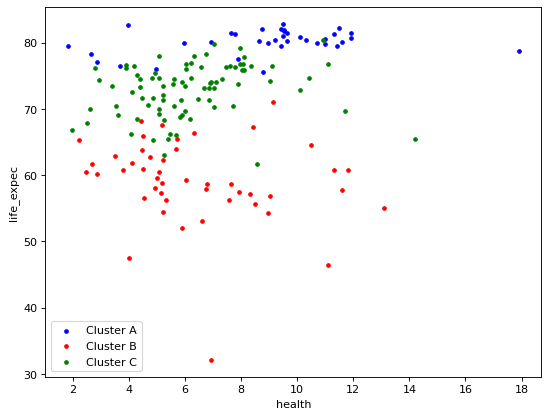

In [ ]:
plt.figure(figsize=(8, 6), dpi=80)
plt.scatter(df_0['health'], df_0['life_expec'], c='blue', s=10, label='Cluster A')
plt.scatter(df_1['health'], df_1['life_expec'], c='red', s=10, label='Cluster B')
plt.scatter(df_2['health'], df_2['life_expec'], c='green', s=10, label='Cluster C')

plt.xlabel('health')
plt.ylabel('life_expec')
plt.legend(),
plt.show

## Task2: Hierarchical Clustering

Simply run the cell to read the data and plot it.

In [ ]:
data = pd.read_csv('co-ordinates.csv')
data.head()

,X,Y
0,-10.288860,-3.480595
1,-11.025979,-4.267757
2,-9.242627,-3.115357
3,9.572838,-0.395079
4,-6.625216,-8.221243




Plot the co-ordinates from the imported data and guess possible clusters that could be formed.

<Axes: xlabel='X', ylabel='Y'>

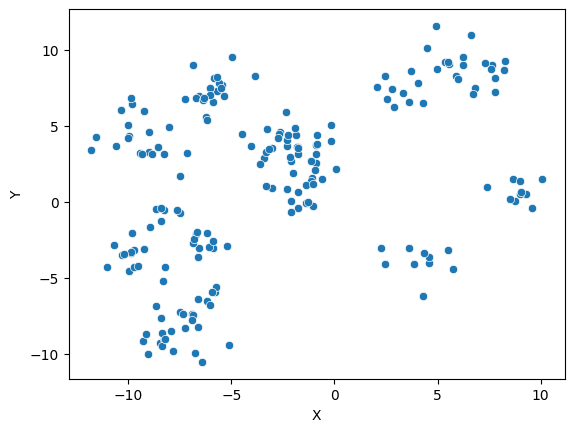

In [ ]:
sns.scatterplot(x=data['X'], y=data['Y'])

In [ ]:
# guess the possible clusters. Explain your guess
#As per the guess there is 7 clusters. We can see there is 4 clusters clearly we can see. there is another cluster in the region where X<0 and Y>0 also X<0 and Y<0
# As per the guess there are 7 clusters.
# C1: X:   -10 -5            Y:  -10 -5
# C2: X:   -10 -5            Y:   -5  0
# C3: X:   -10 -5            Y:    0 10
# C4: X:    -5  0            Y:    0  5
# C5: X:     0  5            Y:   -5  0
# C6: X:     6  10           Y:    0  5
# C7: X:     0  10           Y:    5  10



Using Hierarchical clustering with euclidean + ward and manhattan + average, display the results for clusters 4,5,6 and 7. Add tittle for each plot.

From the results, what according to you should be the appropriate value of K and for which pair of affinity and linkage? Interpret your results. Did this match with your previous guess?

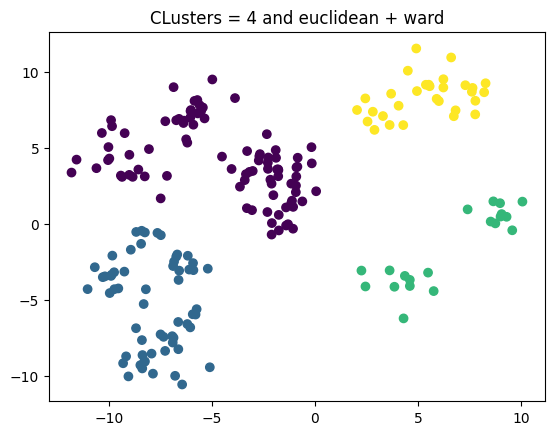

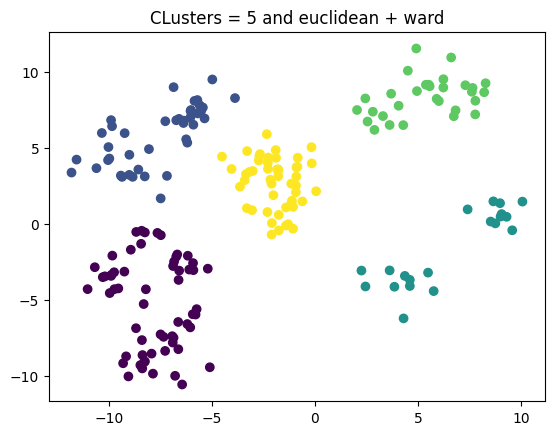

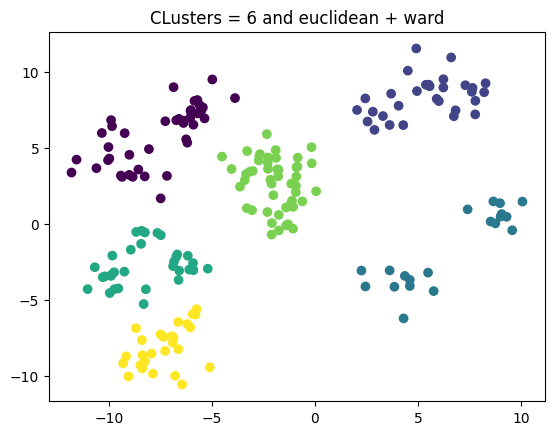

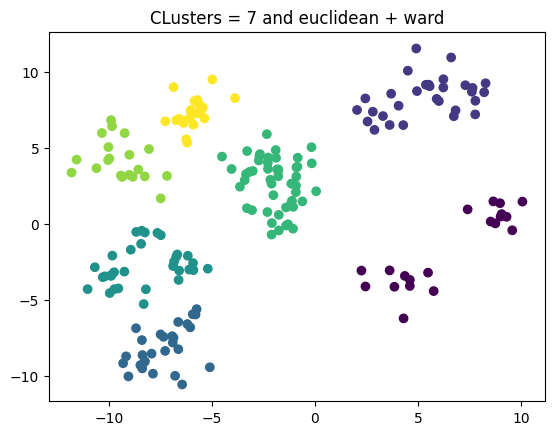

In [ ]:



hierarchical_cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
labels = hierarchical_cluster.fit_predict(data)

plt.scatter(data['X'], data['Y'], c=labels)
plt.title("CLusters = 4 and euclidean + ward")
plt.show()


hierarchical_cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
labels = hierarchical_cluster.fit_predict(data)

plt.scatter(data['X'], data['Y'], c=labels)
plt.title("CLusters = 5 and euclidean + ward")
plt.show()


hierarchical_cluster = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')
labels = hierarchical_cluster.fit_predict(data)

plt.scatter(data['X'], data['Y'], c=labels)
plt.title("CLusters = 6 and euclidean + ward")
plt.show()


hierarchical_cluster = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='ward')
labels = hierarchical_cluster.fit_predict(data)

plt.scatter(data['X'], data['Y'], c=labels)
plt.title("CLusters = 7 and euclidean + ward")
plt.show()


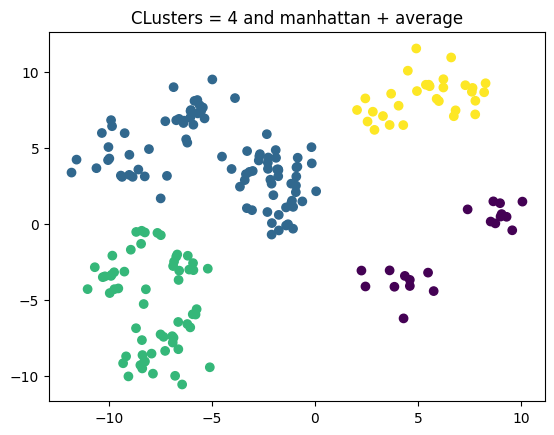

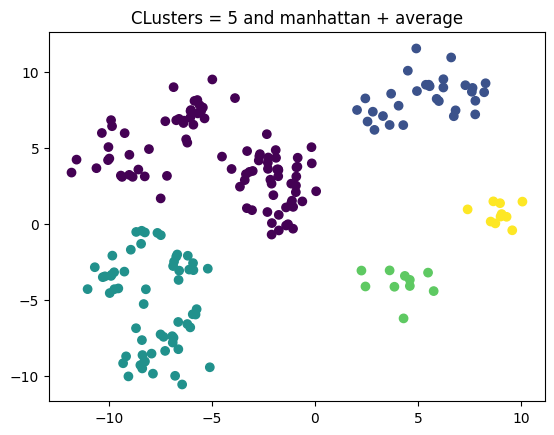

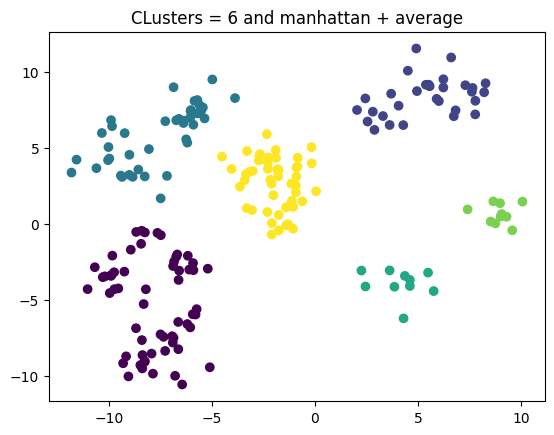

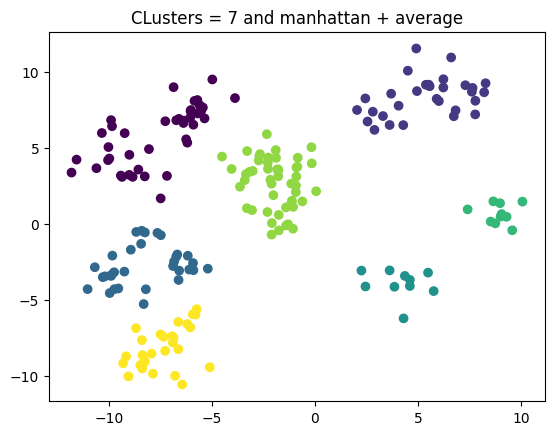

In [ ]:


hierarchical_cluster = AgglomerativeClustering(n_clusters=4, affinity='manhattan', linkage='average')
labels = hierarchical_cluster.fit_predict(data)

plt.scatter(data['X'], data['Y'], c=labels)
plt.title("CLusters = 4 and manhattan + average")
plt.show()


hierarchical_cluster = AgglomerativeClustering(n_clusters=5, affinity='manhattan', linkage='average')
labels = hierarchical_cluster.fit_predict(data)

plt.scatter(data['X'], data['Y'], c=labels)
plt.title("CLusters = 5 and manhattan + average")
plt.show()


hierarchical_cluster = AgglomerativeClustering(n_clusters=6, affinity='manhattan', linkage='average')
labels = hierarchical_cluster.fit_predict(data)

plt.scatter(data['X'], data['Y'], c=labels)
plt.title("CLusters = 6 and manhattan + average")
plt.show()


hierarchical_cluster = AgglomerativeClustering(n_clusters=7, affinity='manhattan', linkage='average')
labels = hierarchical_cluster.fit_predict(data)

plt.scatter(data['X'], data['Y'], c=labels)
plt.title("CLusters = 7 and manhattan + average")
plt.show()


In [ ]:
# interpret your results. Explain your selection
# From above we see k = 7 and manhattan + average gives proper clusters.
# Every cluster is evenly space out and every data point is captured in appropriate cluster.

# The Manhattan distance is a measurement of distance that determines the separation between two points using a grid-like approach. It calculates the total difference in absolute values between the coordinates of two points. Euclidean distance is less resistant to outliers than Manhattan distance.

# The two clusters with the least average distance are combined in average linkage, which instead averages out the distances between all pairs of points in various clusters. This approach tends to produce long, thin clusters and is more resistant to outliers. For data with a linear shape, it functions well.

# The average linkage approach and the Manhattan distance measure might perform better for data that have a linear shape.



From above we see k = 7 and manhattan + average gives proper clusters.
Every cluster is evenly space out and every data point is captured in appropriate cluster.

The Manhattan distance is a measurement of distance that determines the separation between two points using a grid-like approach. It calculates the total difference in absolute values between the coordinates of two points. Euclidean distance is less resistant to outliers than Manhattan distance.

The two clusters with the least average distance are combined in average linkage, which instead averages out the distances between all pairs of points in various clusters. This approach tends to produce long, thin clusters and is more resistant to outliers. For data with a linear shape, it functions well.

The average linkage approach and the Manhattan distance measure might perform better for data that have a linear shape.




For your Selection of K, display the dendogram for the analysis and plot line where K clusters are formed. Give proper Title.

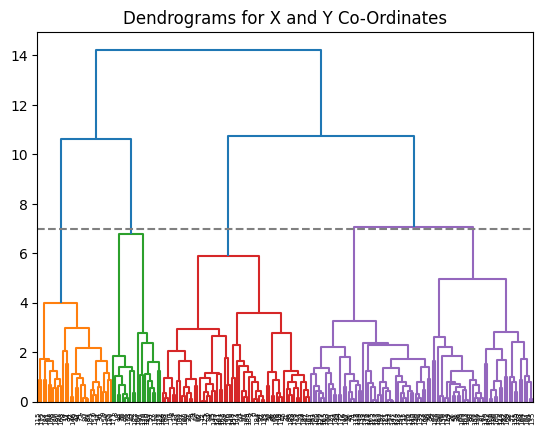

In [ ]:
import scipy.cluster.hierarchy as shc

plt.title("Dendrograms for X and Y Co-Ordinates")
clusters = shc.linkage(data, method='average')
shc.dendrogram(Z=clusters)

k = 7  # Set the number of clusters to be formed
plt.axhline(y=k, c='grey', linestyle='dashed')
plt.show()

In [ ]:
#REFERENCES
# a https://www.w3schools.com/python/python_ml_hierarchial_clustering.asp
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html
# https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html
# https://www.analyticsvidhya.com/blog/2019/05/beginners-guide-hierarchical-clustering/